In [69]:
# !pip install keras
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Dense, Embedding, MaxPooling1D, Conv1D, Dropout, SpatialDropout1D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB   
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.inspection import permutation_importance

import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from hyperopt import fmin, hp, tpe


In [70]:
# pip install hyperopt

In [83]:
demo = pandas.read_csv("demographic.csv")
labs = pandas.read_csv("labs.csv")
exam = pandas.read_csv("examination.csv")
diet = pandas.read_csv("diet.csv")
ques = pandas.read_csv("questionnaire.csv")

demo.drop(['SEQN'], axis = 1, inplace=True)
labs.drop(['SEQN'], axis = 1, inplace=True)
exam.drop(['SEQN'], axis = 1, inplace=True)
diet.drop(['SEQN'], axis = 1, inplace=True)
ques.drop(['SEQN'], axis = 1, inplace=True)




df = pandas.concat([labs,exam],axis=1,join='inner')
df = pandas.concat([df,demo],axis=1,join='inner')
df = pandas.concat([df,diet],axis=1,join='inner')
df = pandas.concat([df,ques],axis=1,join='inner')
# demo  = demo.abs()
# print(len(demo))
# demo.fillna(0, inplace=True)
# print(demo.dtypes)
# data = demo.astype(int)
# print(data.dtypes)
# v = data.iloc[112]
# f = v[5]


In [84]:
cols = [c for c in df.columns if c[-2:]!='SI']
df = df[cols]

In [74]:
# min_value = 0
# max_value = 1000000  
# out_of_range_count = 0

# for column in data.columns:
#     for value in data[column]:
#         if value < min_value or value > max_value:
#             out_of_range_count += 1            
#             print("Out of range value:", value)
# print("Number of out-of-range values:", out_of_range_count)

In [87]:
drop_cols = ['ORXGH', 'ORXGL', 'ORXH06', 'ORXH11', 'ORXH16', 'ORXH18', 'ORXH26', 'ORXH31', 'ORXH33', 'ORXH35', 'ORXH39', 'ORXH40', 'ORXH42', 'ORXH45', 'ORXH51', 'ORXH52', 'ORXH53', 
             'ORXH54', 'ORXH55', 'ORXH56', 'ORXH58', 'ORXH59', 'ORXH61', 'ORXH62', 'ORXH64', 'ORXH66', 'ORXH67', 'ORXH68', 'ORXH69', 'ORXH70', 'ORXH71', 'ORXH72', 'ORXH73', 
             'ORXH81', 'ORXH82', 'ORXH83', 'ORXH84', 'ORXHPC', 'ORXHPI',
             'OHX01TC', 'OHX02TC', 'OHX03TC', 'OHX04TC', 'OHX05TC', 'OHX06TC', 'OHX07TC', 'OHX08TC', 'OHX09TC', 
             'OHX10TC', 'OHX11TC', 'OHX12TC', 'OHX13TC', 'OHX14TC', 'OHX15TC', 'OHX16TC', 'OHX17TC', 'OHX18TC', 'OHX19TC', 'OHX20TC', 'OHX21TC', 'OHX22TC', 'OHX23TC', 'OHX24TC', 
             'OHX25TC', 'OHX26TC', 'OHX27TC', 'OHX28TC', 'OHX29TC', 'OHX30TC', 'OHX31TC', 'OHX32TC', 'OHX02CTC', 'OHX03CTC', 'OHX04CTC', 'OHX05CTC', 'OHX06CTC', 'OHX07CTC', 
             'OHX08CTC', 'OHX09CTC', 'OHX10CTC', 'OHX11CTC', 'OHX12CTC', 'OHX13CTC', 'OHX14CTC', 'OHX15CTC', 'OHX18CTC', 'OHX19CTC', 'OHX20CTC', 'OHX21CTC', 'OHX22CTC', 
             'OHX23CTC', 'OHX24CTC', 'OHX25CTC', 'OHX26CTC', 'OHX27CTC', 'OHX28CTC', 'OHX29CTC', 'OHX30CTC', 'OHX31CTC','DMDHRAGE','WTDR2D','WTINT2YR','WTMEC2YR',
             'PHAFSTMN.x','RIDSTATR'
            ]
df.drop(drop_cols,axis=1,inplace=True)


In [88]:
col_decoder = {
'ACD011A' : 'speak_english',
'AIALANGA' : 'speak_english2',
'ALQ101' : 'drink_alcohol',
'ALQ130' : 'alcohol_per_day',
'AUQ136' : 'ear_infections',
'BMDAVSAD' : 'saggital_abdominal_avg',
'BMXARMC' : 'arm_circum',
'BMXBMI' : 'BMI',
'BMXLEG' : 'leg_length',
'BMXSAD1' : 'saggital_abdominal_1',
'BMXSAD2' : 'saggital_abdominal_2',
'BMXWAIST' : 'waist_circum',
'BMXWT' : 'weight_kg',
'BPQ020' : 'high_bp',
'BPQ056' : 'measure_bp_home',
'BPQ059' : 'measure_bp_doctor',
'BPQ060' : 'cholesterol_checked',
'BPQ070' : 'cholesterol_checked_1y',
'BPQ080' : 'high_cholesterol',
'BPQ090D' : 'cholesterol_prescription',
'BPXDI1' : 'diastolic_bp',
'BPXML1' : 'cuff_max_inflation',
'BPXSY1' : 'blood_pressure_1',
'BPXSY2' : 'blood_pressure_2',
'BPXSY3' : 'blood_pressure_3',
'CBD070' : 'grocery_budget',
'CBD090' : 'nonfood_budget',
'CBD110' : 'food_budget',
'CBD120' : 'restaurant_budget',
'CBD130' : 'food_delivery_budget',
'CBQ505' : 'fast_food',
'CBQ535' : 'saw_nutrition_fast_food',
'CBQ545' : 'use_nutrition_fast_food',
'CBQ550' : 'eat_restaurants',
'CBQ552' : 'eat_chain_restaurants',
'CBQ580' : 'saw_nutrition_restaurant',
'CBQ590' : 'use_nutrition_restaurant',
'CBQ596' : 'saw_my_plate',
'CDQ001' : 'chest_pain_ever',
'CDQ010' : 'short_breath_stairs',
'CSQ030' : 'sensative_smell',
'CSQ100' : 'loss_of_taste',
'CSQ110' : 'taste_in_mouth',
'CSQ202' : 'dry_mouth',
'CSQ204' : 'nasal_congestion',
'CSQ210' : 'wisdom_teeth_removed',
'CSQ220' : 'tonsils_removed',
'CSQ240' : 'head_injury',
'CSQ250' : 'broken_nose',
'CSQ260' : 'sinus_infections',
'DBD100' : 'salt_frequency',
'DBD895' : 'meals_not_homemade',
'DBD900' : 'meals_fast_food',
'DBD905' : 'meals_prepackaged',
'DBD910' : 'frozen_meals_per_month',
'DBQ095Z' : 'salt_type',
'DBQ197' : 'milk_product_per_month',
'DBQ229' : 'milk_drinker',
'DBQ700' : 'healthy_diet',
'DEQ034C' : 'long_sleeve_shirt',
'DEQ034D' : 'use_sunscreen',
'DEQ038G' : 'sunburn_1y',
'DIQ010' : 'diabetes',
'DIQ050' : 'taking_insulin',
'DIQ160' : 'prediabetes',
'DIQ170' : 'diabetes_risk',
'DIQ172' : 'diabetes_concern',
'DIQ180' : 'blood_test_3y',
'DLQ010' : 'deaf',
'DLQ020' : 'blind',
'DLQ040' : 'mental_issues',
'DLQ050' : 'difficulty_walking',
'DLQ060' : 'difficulty_dressing',
'DLQ080' : 'difficulty_errands',
'DMDBORN4' : 'born_in_us2',
'DMDHHSIZ' : 'people_in_house',
'DMDHHSZB' : 'children_in_house',
'DMDHHSZE' : 'people_over_60_in_house',
'DMDHRBR4' : 'born_in_us',
'DMDHRGND' : 'gender2',
'DMDMARTL' : 'Marital_Status',
'DMDYRSUS' : 'years_in_US',
'DPQ010' : 'no_interest_2w',
'DPQ020' : 'depression',
'DPQ030' : 'trouble_sleeping_2w',
'DPQ040' : 'fatigue_2w',
'DPQ050' : 'eating_problems_2w',
'DPQ060' : 'feel_bad_2w',
'DPQ070' : 'trouble_concentrating_2w',
'DPQ080' : 'speaking_problems_2w',
'DPQ090' : 'suicidal_2w',
'DPQ100' : 'depression_difficulty',
'DR1.320Z' : 'water',
'DR1_320Z' : 'plain_water_yesterday',
'DR1_330Z' : 'tap_water_yesterday',
'DR1BWATZ' : 'bottled_water_yesterday',
'DR1HELPD' : 'interview_help',
'DR1TACAR' : 'dietary_alpha_carotene',
'DR1TALCO' : 'alcohol',
'DR1TATOC' : 'dietary_vitamin_e',
'DR1TBCAR' : 'dietary_beta_carotene',
'DR1TCAFF' : 'caffeine',
'DR1TCALC' : 'dietary_calcium',
'DR1TCARB' : 'carb',
'DR1TCHL' : 'dietary_choline',
'DR1TCHOL' : 'cholesterol',
'DR1TCOPP' : 'dietary_copper',
'DR1TCRYP' : 'dietary_beta_cryptoxanthin',
'DR1TFA' : 'dietary_folic_acid',
'DR1TFF' : 'folate_food',
'DR1TFIBE' : 'fiber',
'DR1TFOLA' : 'dietary_folate',
'DR1TIRON' : 'dietary_iron',
'DR1TKCAL' : 'calories',
'DR1TLYCO' : 'dietary_lycopene',
'DR1TLZ' : 'dietary_lutein',
'DR1TM181' : 'octadecenoic_percent',
'DR1TMAGN' : 'magnesium',
'DR1TMFAT' : 'monounsaturated_fats',
'DR1TMOIS' : 'moisture',
'DR1TNIAC' : 'dietary_niacin',
'DR1TP183' : 'octadecatrienoic_percent',
'DR1TPHOS' : 'dietary_phosphorus',
'DR1TPOTA' : 'dietary_potassium',
'DR1TPROT' : 'protein',
'DR1TRET' : 'dietary_retinol',
'DR1TS140' : 'tetradeconoic_percent',
'DR1TSELE' : 'dietary_selenium',
'DR1TSODI' : 'sodium',
'DR1TSUGR' : 'sugar',
'DR1TTFAT' : 'fat',
'DR1TTHEO' : 'dietary_theobromine',
'DR1TVARA' : 'dietary_vitamin_a',
'DR1TVB1' : 'dietary_b1',
'DR1TVB12' : 'dietary_b12',
'DR1TVB2' : 'dietary_b2',
'DR1TVB6' : 'dietary_b6',
'DR1TVC' : 'dietary_vit_c',
'DR1TVD' : 'dietary_vit_d',
'DR1TVK' : 'dietary_vit_k',
'DR1TZINC' : 'dietary_zinc',
'DRABF' : 'breast_fed',
'DRD340' : 'shellfish',
'DRD350A' : 'clams',
'DRD350B' : 'crabs',
'DRD350C' : 'crayfish',
'DRD350D' : 'lobsters',
'DRD350E' : 'mussels',
'DRD350F' : 'oysters',
'DRD350G' : 'scallops',
'DRD350H' : 'shrimp',
'DRD370A' : 'breaded_fish',
'DRD370B' : 'tuna',
'DRD370C' : 'bass',
'DRD370D' : 'catfish',
'DRD370E' : 'cod',
'DRD370F' : 'flatfish',
'DRD370G' : 'haddock',
'DRD370H' : 'mackerel',
'DRD370I' : 'perch',
'DRD370J' : 'pike',
'DRD370K' : 'pollock',
'DRD370L' : 'porgy',
'DRD370M' : 'salmon',
'DRD370N' : 'sardines',
'DRD370O' : 'sea_bass',
'DRD370P' : 'shark',
'DRD370Q' : 'swordfish',
'DRD370R' : 'trout',
'DRD370S' : 'walleye',
'DRD370T' : 'other_fish',
'DRQSDIET' : 'special_diet',
'DRQSDT1' : 'low_cal_diet',
'DRQSDT10' : 'high_protein_diet',
'DRQSDT11' : 'low_gluten_diet',
'DRQSDT12' : 'kidney_diet',
'DRQSDT2' : 'low_fat_diet',
'DRQSDT3' : 'low_salt_diet',
'DRQSDT4' : 'low_sugar_diet',
'DRQSDT5' : 'low_fiber_diet',
'DRQSDT6' : 'high_fiber_diet',
'DRQSDT7' : 'diabetic_diet',
'DRQSDT8' : 'muscle_diet',
'DRQSDT9' : 'low_carb_diet',
'DRQSDT91' : 'other_diet',
'DRQSPREP' : 'salt_used',
'DUQ200' : 'marijuana',
'DUQ370' : 'needle_drugs',
'FSD032A' : 'food_insecure',
'FSD032B' : 'not_enough_food',
'FSD032C' : 'cheap_food',
'FSD032D' : 'cheap_food_children',
'FSD032E' : 'bad_food_children',
'FSD032F' : 'low_food_children',
'FSD151' : 'emergency_food_received',
'FSDAD' : 'food_secure',
'FSDCH' : 'child_food_secure',
'FSDHH' : 'household_food_secure',
'FSQ162' : 'wic_received',
'FSQ165' : 'food_stamps',
'HEQ010' : 'hepetitis_b',
'HEQ030' : 'hepetitis_c',
'HIQ011' : 'health_insurance',
'HIQ210' : 'insurance_gap',
'HIQ270' : 'prescription_insurance',
'HOD050' : 'rooms_in_home',
'HOQ065' : 'homeowner',
'HSAQUEX' : 'health_status_source_data',
'HSD010' : 'general_health',
'HSQ500' : 'ever_had_cold',
'HSQ510' : 'intestinal_illness',
'HSQ520' : 'ever_had_flu',
'HSQ571' : 'donate_blood',
'HSQ590' : 'hiv',
'HUQ010' : 'general_health2',
'HUQ020' : 'health_compared_last_year',
'HUQ030' : 'routine_healthcare',
'HUQ041' : 'healthcare_location',
'HUQ051' : 'dr_visits',
'HUQ071' : 'overnight_hospital',
'HUQ090' : 'mental_health_treatment',
'IMQ011' : 'hepatitis_a_vaccine',
'IMQ020' : 'hepatitis_b_vaccine',
'IND235' : 'monthly_income',
'INDFMMPC' : 'poverty_level_category',
'INDFMMPI' : 'poverty_level_index',
'INDFMPIR' : 'family_income',
'INQ012' : 'self_employ_income',
'INQ020' : 'income_from_wages',
'INQ030' : 'income_from_SS',
'INQ060' : 'disability_income',
'INQ080' : 'retirement_income',
'INQ090' : 'ss_income',
'INQ132' : 'state_assistance_income',
'INQ140' : 'investment_income',
'INQ150' : 'other_income',
'INQ244' : 'family_savings',
'LBDBCDLC' : 'blood_cadmium',
'LBDBGMLC' : 'methyl_mercury',
'LBDHDD' : 'HDL_mg',
'LBDIHGLC' : 'inorganic_mercury',
'LBDNENO' : 'neutrophils_percent',
'LBDTHGLC' : 'blood_mercury',
'LBDWFL' : 'floride_water',
'LBXEOPCT' : 'eosinophils_percent',
'LBXGH' : 'glyco_hemoglobin',
'LBXLYPCT' : 'lymphocite_percent',
'LBXMC' : 'hemoglobin_concentration',
'LBXSAL' : 'blood_albumin',
'LBXSCA' : 'blood_calcium',
'LBXSGL' : 'serum_glucose_mg',
'LBXSTP' : 'blood_protein',
'MCQ010' : 'asthma_ever',
'MCQ025' : 'asthma_age',
'MCQ035' : 'asthma',
'MCQ040' : 'asthma_year',
'MCQ050' : 'asthma_ER',
'MCQ053' : 'anemia',
'MCQ070' : 'psoriasis',
'MCQ080' : 'overweight',
'MCQ082' : 'celiac_disease',
'MCQ086' : 'gluten_free',
'MCQ092' : 'blood_transfusion',
'MCQ149' : 'menstruate',
'MCQ151' : 'menstruate_age',
'MCQ160A' : 'arthritis',
'MCQ160B' : 'congestive_heart_failure',
'MCQ160C' : 'coronary_heart_disease',
'MCQ160D' : 'angina',
'MCQ160E' : 'heart_attack',
'MCQ160F' : 'stroke',
'MCQ160G' : 'emphysema',
'MCQ160K' : 'bronchitis_ever',
'MCQ160L' : 'liver_condition_ever',
'MCQ160M' : 'thyroid_ever',
'MCQ160N' : 'gout',
'MCQ160O' : 'COPD',
'MCQ170K' : 'bronchitis_now',
'MCQ170L' : 'liver_condition',
'MCQ170M' : 'thyroid_now',
'MCQ180A' : 'arthritis_age',
'MCQ180B' : 'heart_failure_age',
'MCQ180C' : 'heart_disease_age',
'MCQ180D' : 'angina_age',
'MCQ180E' : 'heart_attack_age',
'MCQ180F' : 'stroke_age',
'MCQ180G' : 'emphysema_age',
'MCQ180K' : 'bronchitis_age',
'MCQ180L' : 'liver_condition_age',
'MCQ180M' : 'thyroid_age',
'MCQ180N' : 'gout_age',
'MCQ195' : 'arthritis_type',
'MCQ203' : 'jaundice',
'MCQ206' : 'jaundice_age',
'MCQ220' : 'cancer',
'MCQ230A' : 'cancer_type1',
'MCQ230B' : 'cancer_type2',
'MCQ230C' : 'cancer_type3',
'MCQ230D' : 'cancer_type4',
'MCQ240A' : 'bladder_cancer_age',
'MCQ240AA' : 'test_cancer_age',
'MCQ240B' : 'blood_cancer_age',
'MCQ240BB' : 'thyroid_cancer_age',
'MCQ240C' : 'bone_cancer_age',
'MCQ240CC' : 'uterine_cancer_age',
'MCQ240D' : 'brain_cancer_age',
'MCQ240DK' : 'cancer_age',
'MCQ240E' : 'breast_cancer_age',
'MCQ240F' : 'cervical_cancer_age',
'MCQ240G' : 'colon_cancer_age',
'MCQ240H' : 'esoph_cancer_age',
'MCQ240I' : 'gallbladder_cancer_age',
'MCQ240J' : 'kidney_cancer_age',
'MCQ240K' : 'larynx_cancer_age',
'MCQ240L' : 'leukemia_age',
'MCQ240M' : 'liver_cancer_age',
'MCQ240N' : 'lung_cancer_age',
'MCQ240O' : 'lymphoma_age',
'MCQ240P' : 'melanoma_age',
'MCQ240Q' : 'mouth_cancer_age',
'MCQ240R' : 'nervous_cancer_age',
'MCQ240S' : 'ovarian_cancer_age',
'MCQ240T' : 'pancreatic_cancer_age',
'MCQ240U' : 'prostate_cancer_age',
'MCQ240V' : 'rectal_cancer_age',
'MCQ240X' : 'skin_cancer_age',
'MCQ240Y' : 'soft_cancer_age',
'MCQ240Z' : 'stomach_cancer_age',
'MCQ300A' : 'relative_heart_attack',
'MCQ300B' : 'relative_asthma',
'MCQ300C' : 'relative_diabetes',
'MCQ365A' : 'need_weight_loss',
'MCQ365B' : 'need_exercise',
'MCQ365C' : 'need_reduce_salt',
'MCQ365D' : 'need_reduce_calories',
'MCQ370A' : 'losing_weight',
'MCQ370B' : 'excercising',
'MCQ370C' : 'reducing_salt',
'MCQ370D' : 'reducing_fat',
'MGDCGSZ' : 'grip_strength',
'OCD150' : 'work_done',
'OCD270' : 'months_of_work',
'OCD390G' : 'type_of_work',
'OCD395' : 'job_duration',
'OCQ260' : 'non_govt_employee',
'OHQ030' : 'visit_dentist',
'OHQ033' : 'dentist_reason',
'OHQ620' : 'aching_mouth',
'OHQ640' : 'mouth_problems',
'OHQ680' : 'mouth_problems2',
'OHQ770' : 'need_dental',
'OHQ835' : 'gum_disease',
'OHQ845' : 'teeth_health',
'OHQ850' : 'gum_treatment',
'OHQ855' : 'loose_teeth',
'OHQ860' : 'teeth_bone_loss',
'OHQ865' : 'weird_tooth',
'OHQ870' : 'floss',
'OHQ875' : 'use_mouthwash',
'OHQ880' : 'oral_cancer_exam',
'OHQ885' : 'oral_cancer_exam2',
'OSQ060' : 'osteoporosis',
'OSQ130' : 'take_prednisone',
'OSQ230' : 'metal_objects',
'PAAQUEX' : 'question_source',
'PAD680' : 'sedentary_time',
'PAQ605' : 'vigorous_work',
'PAQ620' : 'moderate_work',
'PAQ635' : 'walk_or_bike',
'PAQ650' : 'vigorous_recreation',
'PAQ665' : 'moderate_recreation',
'PAQ710' : 'tv_hours',
'PAQ715' : 'pc_hours',
'PEASCST1' : 'bp_status',
'PEASCTM1' : 'blood_pressure_time',
'PFQ049' : 'work_limitations',
'PFQ051' : 'work_limitations2',
'PFQ054' : 'walk_equipment_required',
'PFQ057' : 'confusion_memory_problems',
'PFQ090' : 'special_healthcare_equipment',
'PUQ100' : 'insecticide_used',
'PUQ110' : 'weedkiller_used',
'RIAGENDR' : 'gender',
'RIDAGEYR' : 'age',
'RIDRETH1' : 'hispanic',
'RXQ510' : 'take_aspirin',
'SEQN' : 'ID',
'SLD010H' : 'sleep_hours',
'SLQ050' : 'trouble_sleeping',
'SLQ060' : 'sleep_disorder',
'SMAQUEX.x' : 'question_mode',
'SMAQUEX.y' : 'question_mode2',
'SMAQUEX2' : 'question_mode3',
'SMD460' : 'smokers_in_house',
'SMDANY' : 'tobaco_1w',
'SMQ681' : 'smoked_1w',
'SMQ851' : 'tobaco2_1w',
'SMQ856' : 'smoked_at_work',
'SMQ858' : 'someone_smoked_at_job',
'SMQ860' : 'smoked_at_restaurant',
'SMQ863' : 'nicotine_1w',
'SMQ866' : 'smoked_at_bar',
'SMQ870' : 'smoked_in_car',
'SMQ872' : 'someone_smoked_in_car',
'SMQ874' : 'smoked_another_home',
'SMQ876' : 'someone_smoked_in_home',
'SMQ878' : 'smoked_other_building',
'SMQ880' : 'someone_smoked_other_building',
'SXD021' : 'sex_ever',
'URXUCR' : 'creatinine_urine',
'WHD010' : 'height_in',
'WHD020' : 'current_weight_lb',
'WHD050' : 'weight_1y',
'WHD110' : 'weight_10y',
'WHD120' : 'weight_age_25',
'WHD140' : 'greatest_weight',
'WHQ030' : 'overweight_self',
'WHQ040' : 'weightloss_desire',
'WHQ070' : 'weightloss_attempt',
'WHQ150' : 'age_when_heaviest'
}
df = df.rename(columns=col_decoder)
labs = labs.rename(columns=col_decoder)
demo = demo.rename(columns=col_decoder)
exam = exam.rename(columns=col_decoder)
ques = ques.rename(columns=col_decoder)
diet = diet.rename(columns=col_decoder)

In [89]:
cancer_df = df.dropna(subset=['cancer'])
diabetes_df = df.dropna(subset=['diabetes'])
heart_df = df.dropna(subset=['coronary_heart_disease'])
liver_df = df.dropna(subset=['liver_condition'])

In [90]:
target_dfs = [cancer_df, diabetes_df, heart_df, liver_df]

In [91]:
for df in target_dfs:
    df.replace({7:None, 9:None, 77:None,99:None,777:None,999:None,7777:None,9999:None,77777:None,99999:None,
            777777:None,999999:None,55:None,555:None,5555:None,8:None,88:None}, inplace=True)


In [92]:
df.replace({7:None, 9:None, 77:None,99:None,777:None,999:None,7777:None,9999:None,77777:None,99999:None,
            777777:None,999999:None,55:None,555:None,5555:None,8:None,88:None}, inplace=True)

In [96]:
def filter_columns(df,cutoff=0.9):
    tot_rows = df.shape[0]
    removed_cols = []
    print("original number of columns: ", df.shape[1])
    for col in df.columns:
        num_na  =df[col].isna().sum()
        if (num_na/tot_rows) > cutoff:
            removed_cols.append(col)

    print("number of columns removed: ", len(removed_cols))
    return df.drop(removed_cols,axis=1)

def filter_rows(df,cutoff=0.9):
    tot_cols = df.shape[0]
    print("original number of rows: ", df.shape[0])
    df = df[df.isnull().sum(axis=1) < tot_cols*cutoff]
    print("remaining rows: ", df.shape[0])
    return df

In [97]:
def trans_cat_cols(df, cat_cols):
    for col in cat_cols:
        df.loc[df[col] != 1, col] = 0
    return df

In [98]:
x = df.nunique()
cat_cols = x[(x<15)].index
df = trans_cat_cols(df, cat_cols)

In [99]:
for df in target_dfs:
    x = df.nunique()
    cat_cols = x[(x<15)].index
    df = trans_cat_cols(df,cat_cols)

In [100]:
for df in target_dfs:
    df = filter_rows(df , cutoff=0.8)
    df = filter_columns(df , cutoff=0.5)

original number of rows:  5561
remaining rows:  5561
original number of columns:  1660
number of columns removed:  259
original number of rows:  9422
remaining rows:  9422
original number of columns:  1660
number of columns removed:  281
original number of rows:  5561
remaining rows:  5561
original number of columns:  1660
number of columns removed:  259
original number of rows:  225
remaining rows:  185
original number of columns:  1660
number of columns removed:  143


In [101]:
for df in target_dfs:
    df.fillna(df.mode().iloc[0], inplace=True)

In [61]:
# X=data
# y=data
# X.shape, y.shape
# X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=8) 

In [102]:
lifestyle_cols = ['drink_alcohol','alcohol_per_day','saggital_abdominal_avg','arm_circum','BMI',
                  'saggital_abdominal_1','saggital_abdominal_2','waist_circum','weight_kg',
                  'grocery_budget','nonfood_budget','food_budget',
                  'restaurant_budget','food_delivery_budget','fast_food','saw_nutrition_fast_food',
                  'use_nutrition_fast_food','eat_restaurants','eat_chain_restaurants','saw_nutrition_restaurant',
                  'use_nutrition_restaurant','saw_my_plate','wisdom_teeth_removed','tonsils_removed',
                  'salt_frequency','meals_not_homemade','meals_fast_food','meals_prepackaged',
                  'frozen_meals_per_month','salt_type','milk_product_per_month','milk_drinker','healthy_diet',
                  'long_sleeve_shirt','use_sunscreen','people_in_house','children_in_house','Marital_Status',
                  'trouble_sleeping_2w','eating_problems_2w','water','plain_water_yesterday','tap_water_yesterday',
                  'bottled_water_yesterday','dietary_alpha_carotene','alcohol','dietary_vitamin_e',
                  'dietary_beta_carotene','caffeine','dietary_calcium','carb','dietary_choline','cholesterol',
                  'dietary_copper','dietary_beta_cryptoxanthin','dietary_folic_acid','folate_food','fiber',
                  'dietary_folate','dietary_iron','calories','dietary_lycopene','dietary_lutein',
                  'octadecenoic_percent','magnesium','monounsaturated_fats','moisture','dietary_niacin',
                  'octadecatrienoic_percent','dietary_phosphorus','dietary_potassium','protein','dietary_retinol',
                  'tetradeconoic_percent','dietary_selenium','sodium','sugar','fat','dietary_theobromine',
                  'dietary_vitamin_a','dietary_b1','dietary_b12','dietary_b2','dietary_b6','dietary_vit_c',
                  'dietary_vit_d','dietary_vit_k','dietary_zinc','shellfish','clams','crabs','crayfish',
                  'lobsters','mussels','oysters','scallops','shrimp','breaded_fish','tuna','bass','catfish',
                  'cod','flatfish','haddock','mackerel','perch','pike','pollock','porgy','salmon','sardines',
                  'sea_bass','shark','swordfish','trout','walleye','other_fish','special_diet','low_cal_diet',
                  'high_protein_diet','low_gluten_diet','kidney_diet','low_fat_diet','low_salt_diet','low_sugar_diet',
                  'low_fiber_diet','high_fiber_diet','muscle_diet','low_carb_diet','other_diet','salt_used',
                  'marijuana','needle_drugs','food_insecure','not_enough_food','cheap_food','cheap_food_children',
                  'bad_food_children','low_food_children','emergency_food_received','food_secure','child_food_secure',
                  'household_food_secure','wic_received','food_stamps','health_insurance','insurance_gap',
                  'prescription_insurance','donate_blood','routine_healthcare','healthcare_location','dr_visits',
                  'hepatitis_a_vaccine','hepatitis_b_vaccine','neutrophils_percent','floride_water',
                  'overweight','gluten_free','losing_weight','excercising',
                  'reducing_salt','reducing_fat','work_done','months_of_work','type_of_work','job_duration',
                  'non_govt_employee','visit_dentist','floss','use_mouthwash','take_prednisone','sedentary_time',
                  'vigorous_work','moderate_work','walk_or_bike','vigorous_recreation','moderate_recreation',
                  'tv_hours','pc_hours','bp_status','insecticide_used','weedkiller_used','age',
                  'sleep_hours','smokers_in_house','tobaco_1w','smoked_1w','tobaco2_1w','smoked_at_work',
                  'someone_smoked_at_job','smoked_at_restaurant','nicotine_1w','smoked_at_bar','smoked_in_car',
                  'someone_smoked_in_car','smoked_another_home','someone_smoked_in_home','smoked_other_building',
                  'someone_smoked_other_building','weight_1y','weight_10y','weight_age_25','greatest_weight',
                  'overweight_self','weightloss_desire','weightloss_attempt']


In [65]:
# print(df.columns)
# for d in df:
    # print(d.find('age'))

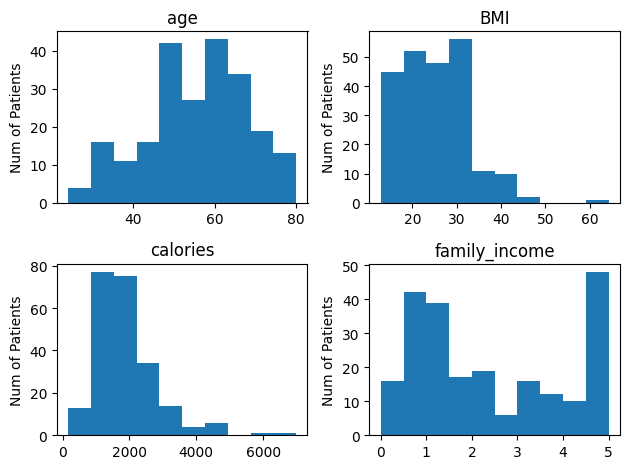

In [103]:
cols = ['age','BMI','calories','family_income']

fig, ax = plt.subplots(2, 2)
for i, col in enumerate(cols):
    ax[i//2, i%2].hist(df[col])
    ax[i//2, i%2].set_title(col)
    ax[i//2, i%2].set_ylabel("Num of Patients")
plt.tight_layout()

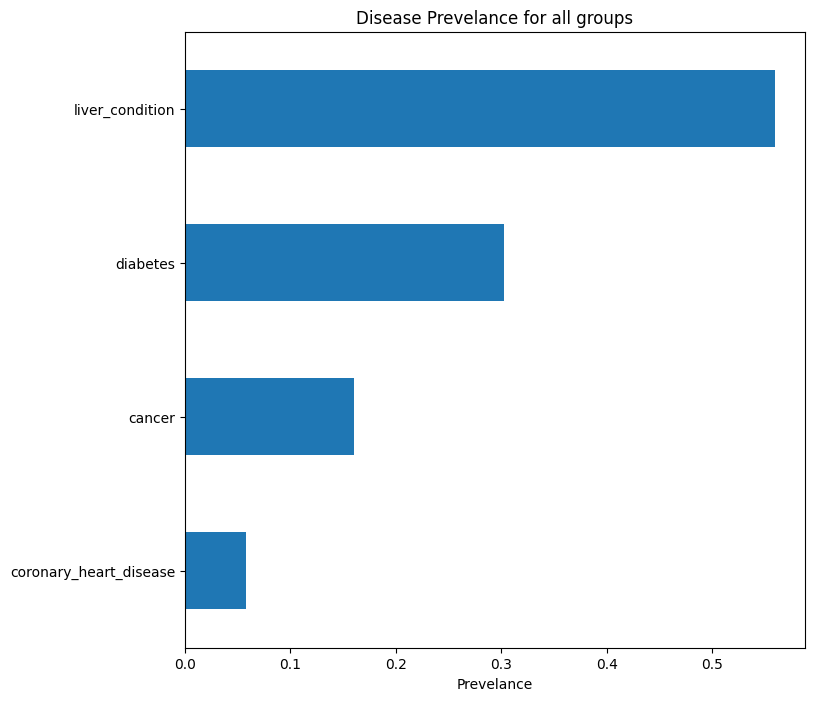

In [105]:
# cancer_df = df.dropna(subset=['cancer'])
# diabetes_df = df.dropna(subset=['diabetes'])
# heart_df = df.dropna(subset=['coronary_heart_disease'])
# liver_df = df.dropna(subset=['liver_condition'])
targets = ['cancer','diabetes','coronary_heart_disease','liver_condition']
plot = df[targets].mean().sort_values().plot.barh(figsize=(8,8))
plot.set_xlabel("Prevelance")
plot.set_title("Disease Prevelance for all groups")
plt.show()

<Axes: ylabel='counter'>

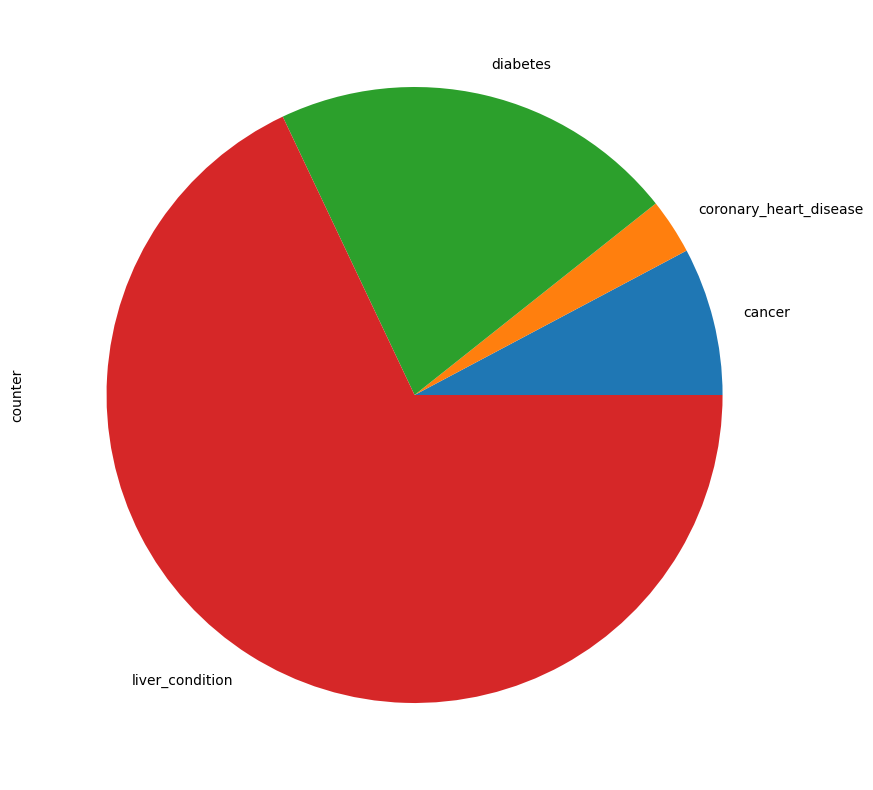

In [106]:
target_df = df[targets]
target_df = target_df[target_df.mean(axis=1) == 1/4]
target_df['disease'] = target_df.idxmax(1)
target_df['counter'] = 1
plt.figure(figsize = (10,10))
target_df.groupby('disease').counter.count().plot(kind='pie')

In [108]:
for df in target_dfs:
    ex_df = df[list(set(df.columns) & set(lifestyle_cols))]
    corr = ex_df.corr()
    corr = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
    redun = corr[abs(corr) >= 0.9].stack().reset_index()['level_1']
    ex_df = ex_df.drop(redun, axis=1)
    corr = ex_df.corr()
    corr = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
    big_corr = ex_df[corr[abs(corr).max() > 0.5].index].corr()
    big_corr = big_corr.mask(np.tril(np.ones(big_corr.shape)).astype(np.bool))
    big_corr = ex_df[big_corr[abs(big_corr).max() > 0.5].index].corr()

    plt.figure(figsize = (10,8))
    sns.heatmap(big_corr, 
            xticklabels=big_corr.columns,
            yticklabels=big_corr.columns,
            cmap="PiYG",
            vmin=-1, vmax=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3620\136439959.py:4: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  corr = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Correlations with  cancer


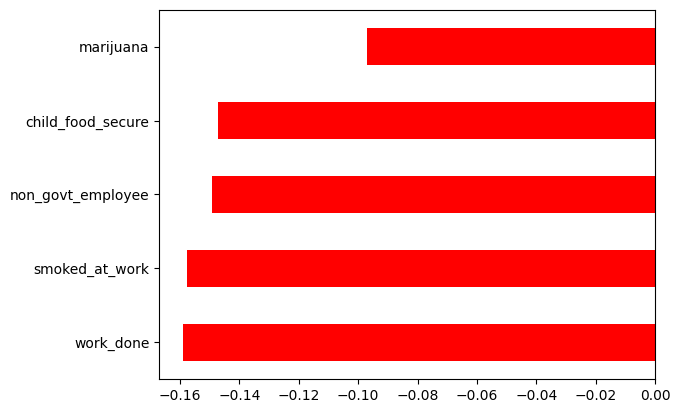

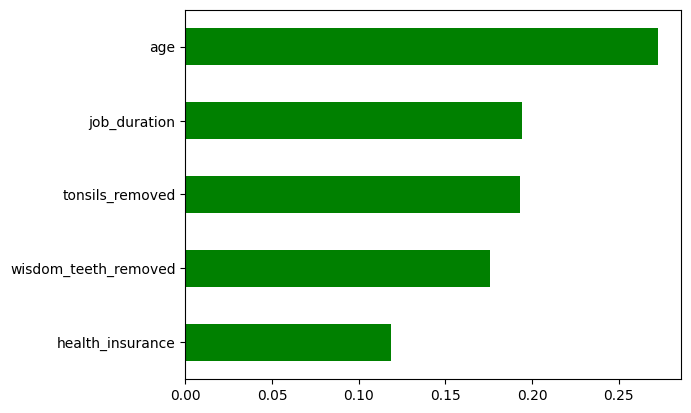

Correlations with  diabetes


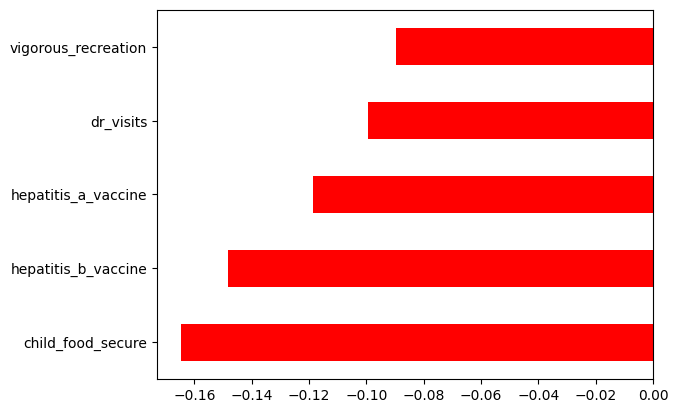

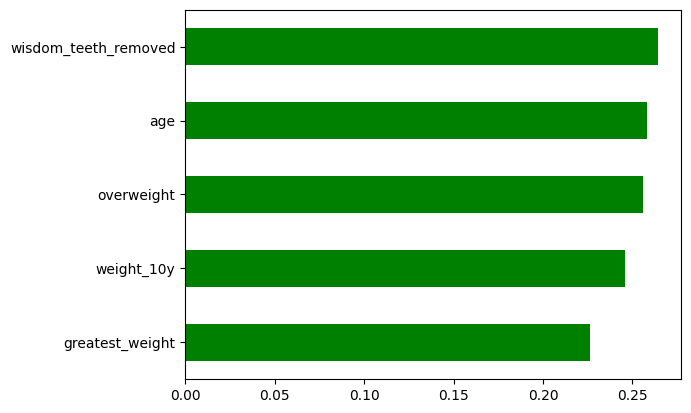

Correlations with  coronary_heart_disease


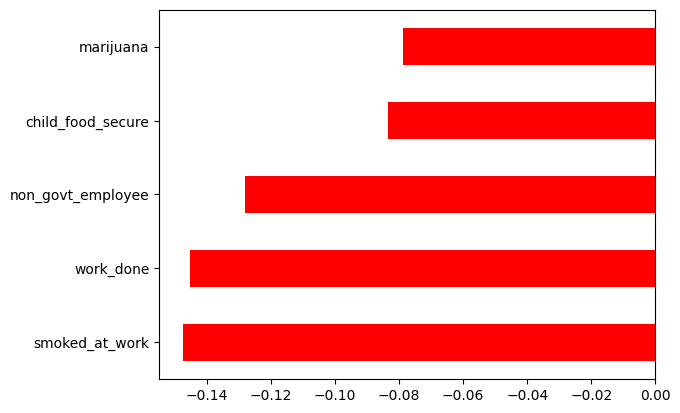

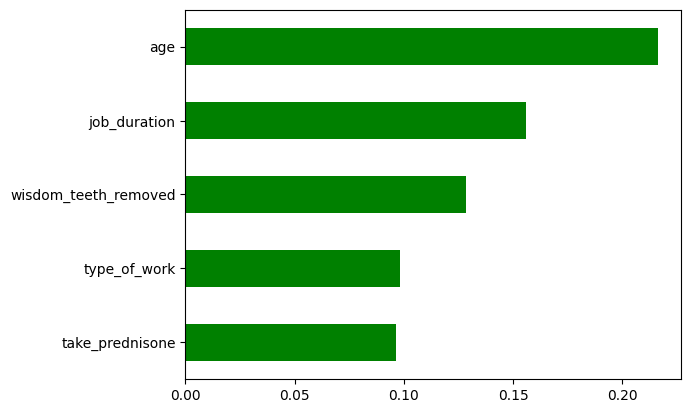

Correlations with  liver_condition


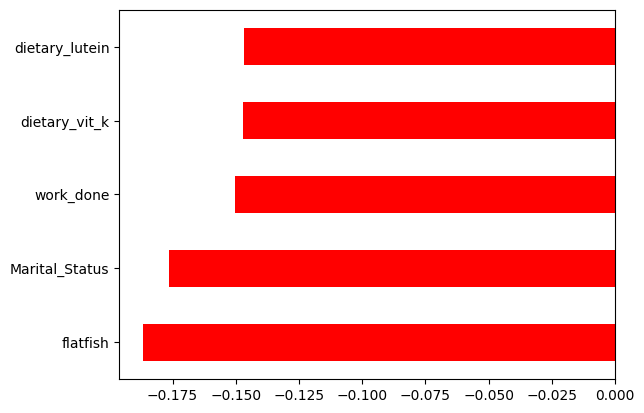

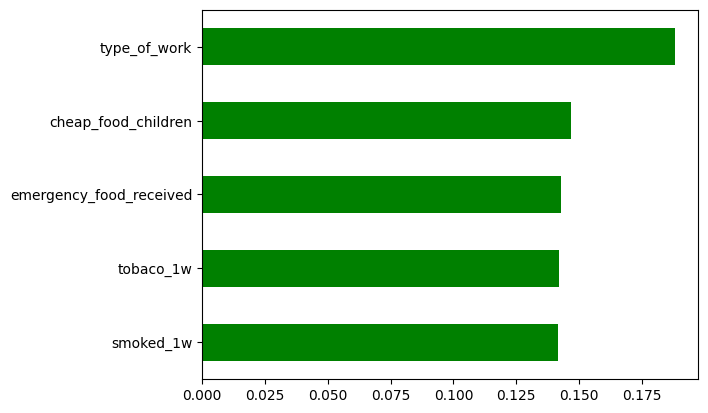

In [109]:
neg_factors = set()
pos_factors = set()
for col, df in zip(targets, target_dfs):
    ex_df = df[list(set(df.columns) & set(lifestyle_cols))]
    print('==========================')
    print("Correlations with ", col)
    print('==========================')
    corr = ex_df.corrwith(df[col])
    neg_factors.update(corr.sort_values().dropna().head(10).index)
    pos_factors.update(corr.sort_values().dropna().tail(10).index)
    temp_df = corr.sort_values().dropna().head(5)
    temp_df.plot(kind='barh',
                    color=(temp_df > 0).map({True: 'g',
                                                    False: 'r'}))
    plt.show()
    temp_df = corr.sort_values().dropna().tail(5)
    temp_df.plot(kind='barh',
                    color=(temp_df > 0).map({True: 'g',
                                                    False: 'r'}))
    plt.show()

<Axes: >

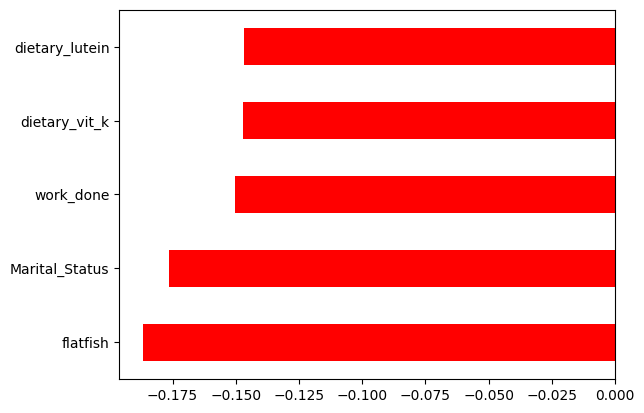

In [110]:
temp_df = corr.sort_values().dropna().head(5)
temp_df.plot(kind='barh',
                    color=(temp_df > 0).map({True: 'g',
                                                    False: 'r'}))

In [112]:
temp_df > 0
neg_factors

{'Marital_Status',
 'alcohol_per_day',
 'child_food_secure',
 'children_in_house',
 'dietary_lutein',
 'dietary_vit_k',
 'dr_visits',
 'flatfish',
 'floride_water',
 'food_secure',
 'grocery_budget',
 'hepatitis_a_vaccine',
 'hepatitis_b_vaccine',
 'household_food_secure',
 'marijuana',
 'non_govt_employee',
 'smoked_another_home',
 'smoked_at_work',
 'use_sunscreen',
 'vigorous_recreation',
 'visit_dentist',
 'wic_received',
 'work_done'}

<Axes: >

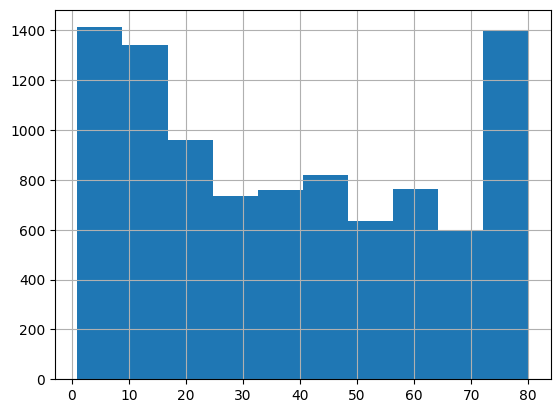

In [113]:
diabetes_df.age.hist()

In [114]:
def tree_diag(target, df, depth=5, ratio=3):
    ex_df = df[list(set(df.columns) & set(lifestyle_cols))]
    tree_mod = DecisionTreeClassifier(max_depth=depth, class_weight={0:1,1:ratio})
    tree_mod.fit(ex_df, df[target])
    fig = plt.figure(figsize=(18,13))
    _ = tree.plot_tree(tree_mod,
                      feature_names = ex_df.columns,
                      class_names = ['healthy',target],
                      filled=True)
def tree_f1(target, df, ratio=3):
    ex_df = df[list(set(df.columns) & set(lifestyle_cols))]
    X_train, X_test, y_train, y_test = train_test_split(ex_df, df[[target]], test_size=0.2)
    tree_mod = DecisionTreeClassifier(class_weight={0:1,1:ratio}, ccp_alpha=0.0001)
    tree_mod.fit(X_train, y_train)
    return(f1_score(tree_mod.predict(X_test),y_test))

In [115]:
print('Diabetes F1 score: ', tree_f1('diabetes', diabetes_df, ratio=12))
print('Cancer F1 score: ', tree_f1('cancer', cancer_df, ratio=10))
print('Heart Disease F1 score: ', tree_f1('coronary_heart_disease', heart_df, ratio=20))
print('Liver Disease F1 score: ', tree_f1('liver_condition', liver_df, ratio=0.5))

Diabetes F1 score:  0.2074074074074074
Cancer F1 score:  0.1970443349753695
Heart Disease F1 score:  0.02325581395348837
Liver Disease F1 score:  0.6428571428571429


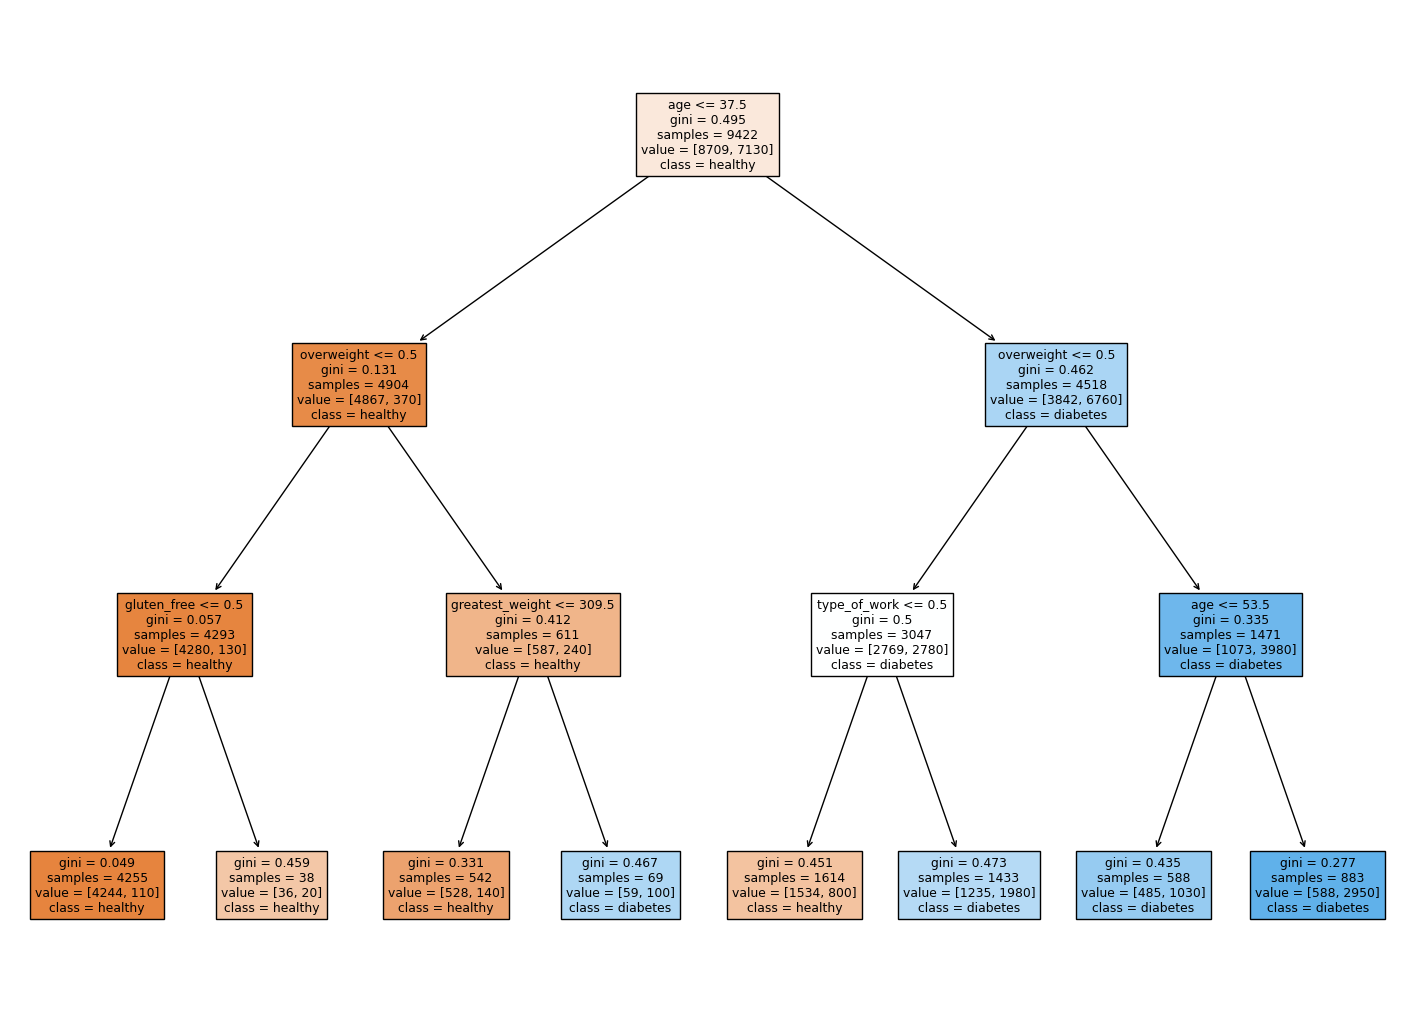

In [116]:
tree_diag('diabetes', diabetes_df, depth=3, ratio=10)

In [117]:
def nhanes_pred(model, target, df, proba=False):
    ex_df = df[list(set(df.columns) & set(lifestyle_cols))]
    X = ex_df
    y = df[[target]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train.values.ravel())
    if proba:
        preds = model.predict_proba(X_test)[:,1]
    else:
        preds = model.predict(X_test)
    return y_test, preds

def plot_roc(y_test, probs):
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
    plt.plot([0,1],[0,1],'r--')

    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.legend(loc='lower right')
    plt.show()


cancer  F1 score:  0.2659758203799655
diabetes  F1 score:  0.3116883116883116
coronary_heart_disease  F1 score:  0.1585081585081585
liver_condition  F1 score:  0.7692307692307692


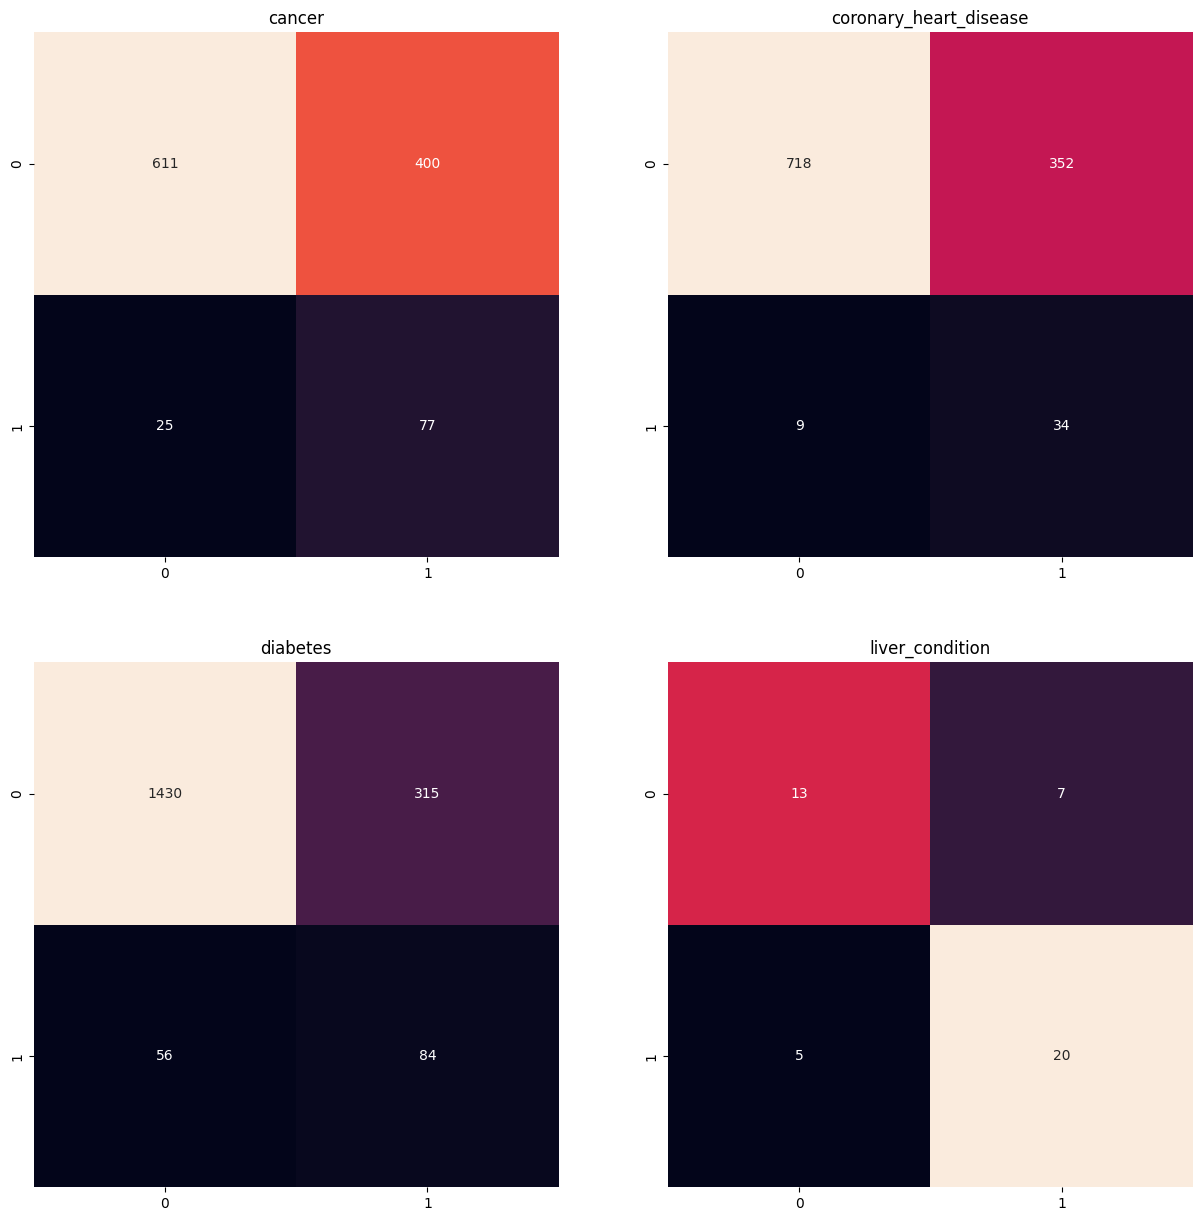

In [118]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
for (i, target), df in zip(enumerate(targets), target_dfs):
    nb = GaussianNB()#var_smoothing=0.0000001)
    y_test, preds = nhanes_pred(nb, target, df)
    print(target, ' F1 score: ', f1_score(y_test,preds))
    mat = confusion_matrix(y_test, preds)
    sns.heatmap(mat, ax=ax[i%2, i//2], square=True, annot=True, cbar=False, fmt='d').set_title(target)
    
plt.show()

In [119]:
nb = GaussianNB(var_smoothing=0.0000001)
ex_df = cancer_df[list(set(cancer_df.columns) & set(lifestyle_cols))]
X = ex_df
y = cancer_df[['cancer']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
nb.fit(X_train, y_train.values.ravel())

GaussianNB(var_smoothing=1e-07)

In [120]:
imps = permutation_importance(nb, X_test, y_test)
importances = imps.importances_mean

<Axes: ylabel='feature'>

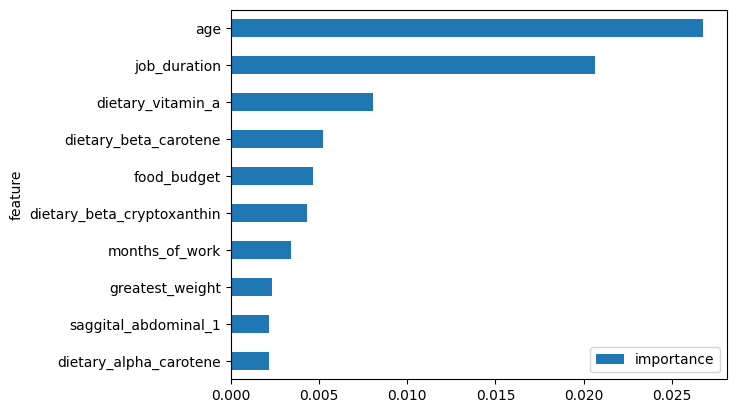

In [121]:
imp_df = pd.DataFrame(ex_df.columns, columns=['feature'])
imp_df['importance'] = importances
imp_df.set_index('feature').sort_values(by='importance').tail(10).plot.barh()

In [122]:
space = {
        'C': hp.quniform('C', 0.005,1.0,0.01),
        'kernel': hp.choice('kernel', ['poly', 'sigmoid', 'rbf']),
        'degree': hp.choice('degree', [1,2,3,4])
        }

In [123]:
ex_df = heart_df[list(set(heart_df.columns) & set(lifestyle_cols))]
X_train, X_test, y_train, y_test = train_test_split(ex_df, heart_df.coronary_heart_disease, test_size=0.5)

In [124]:
def svm_score(params):
    mod = svm.SVC(**params)
    mod.fit(X_train, y_train.values.ravel())
    predictions = mod.predict(X_test)
    return 1 - f1_score(y_test, predictions)

In [125]:
def get_params(score):    
    best = fmin(score, space, algo=tpe.suggest, max_evals=100)
    return best

In [126]:
get_params(svm_score)

100%|██████████| 100/100 [00:22<00:00,  4.38trial/s, best loss: 0.9571428571428572]


{'C': 0.26, 'degree': 1, 'kernel': 1}

In [127]:
best_params = {'C': 0.17, 'degree': 2, 'kernel': 'sigmoid'}

In [128]:
for target, df in zip(targets, target_dfs):
    mod = svm.SVC(**best_params)
    ex_df = df[list(set(df.columns) & set(lifestyle_cols))]
    X_train, X_test, y_train, y_test = train_test_split(ex_df, df[[target]], test_size=0.2)
    mod.fit(X_train, y_train.values.ravel())
    predictions = mod.predict(X_test)
    print('F1 score for ', target, ': ', f1_score(y_test, predictions))

F1 score for  cancer :  0.08974358974358974
F1 score for  diabetes :  0.0
F1 score for  coronary_heart_disease :  0.03508771929824562
F1 score for  liver_condition :  0.676470588235294


In [129]:
heart_df.coronary_heart_disease.value_counts()[0]/heart_df.coronary_heart_disease.value_counts()[1]


23.825892857142858

In [130]:
targets

['cancer', 'diabetes', 'coronary_heart_disease', 'liver_condition']

In [131]:
space = {
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 8, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'scale_pos_weight': hp.choice('scale_pos_weight', np.arange(5, 25, dtype=int)),
        'eval_metric': 'auc'
    }

In [132]:
def xg_score(params):
    mod = xgb.train(params, dtrain,
                    early_stopping_rounds=100,
                    evals=[(dvalid,'valid'), (dtrain,'train')],
                    verbose_eval=False)
    predictions = mod.predict(dvalid)
    return 1 - roc_auc_score(y_test, predictions)

In [134]:
ex_df = heart_df[list(set(heart_df.columns) & set(lifestyle_cols))]
X_train, X_test, y_train, y_test = train_test_split(ex_df, heart_df.coronary_heart_disease, test_size=0.2)
dtrain = xgb.DMatrix(data=X_train.values,
                     feature_names=X_train.columns,
                     label=y_train.values)
dvalid = xgb.DMatrix(data=X_test.values,
                     feature_names=X_test.columns,
                     label=y_test.values)

In [135]:
def get_params(score):    
    best = fmin(score, space, algo=tpe.suggest, max_evals=250)
    return best

In [136]:
get_params(xg_score)

100%|██████████| 250/250 [01:00<00:00,  4.13trial/s, best loss: 0.15213954287678289]


{'colsample_bytree': 0.6000000000000001,
 'eta': 0.35000000000000003,
 'gamma': 0.9500000000000001,
 'max_depth': 0,
 'min_child_weight': 5.0,
 'scale_pos_weight': 11,
 'subsample': 0.65}

In [137]:
best_params = {'colsample_bytree': 0.7,
                'eta': 0.45,
                'gamma': 0.55,
                'max_depth': 1,
                'min_child_weight': 1.0,
                'subsample': 0.85,
                'scale_pos_weight': 13,
                'eval_metric': 'auc'}

cancer  F1 score:  0.26774847870182555
diabetes  F1 score:  0.372093023255814
coronary_heart_disease  F1 score:  0.18627450980392155
liver_condition  F1 score:  0.6769230769230768


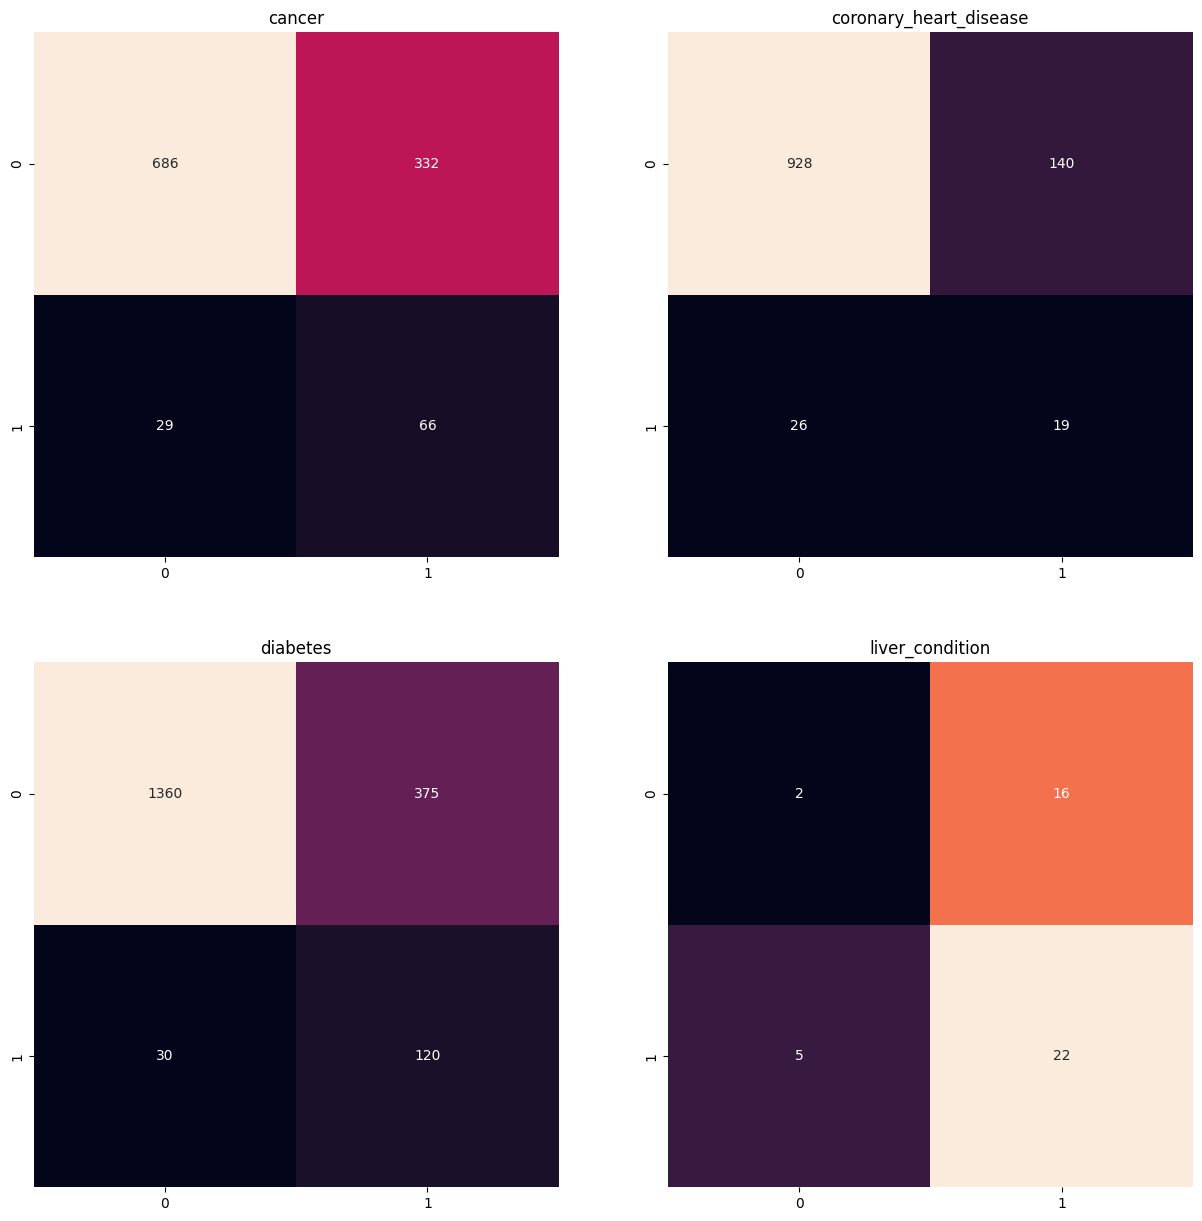

In [138]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
for (i, target),df in zip(enumerate(targets), target_dfs):
    
    xgc = XGBClassifier(**best_params)
    y_test, preds = nhanes_pred(xgc, target, df)
    mat = confusion_matrix(y_test, preds)
    sns.heatmap(mat, ax=ax[i%2, i//2], square=True, annot=True, cbar=False, fmt='d').set_title(target)
    print(target, ' F1 score: ', f1_score(y_test,preds))
plt.show()

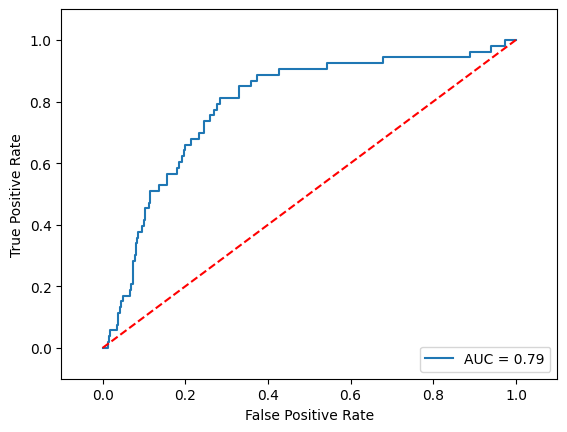

In [139]:
xgc = XGBClassifier(**best_params)
y_test, probs = nhanes_pred(xgc, 'coronary_heart_disease', heart_df, proba=1)
plot_roc(y_test, probs)

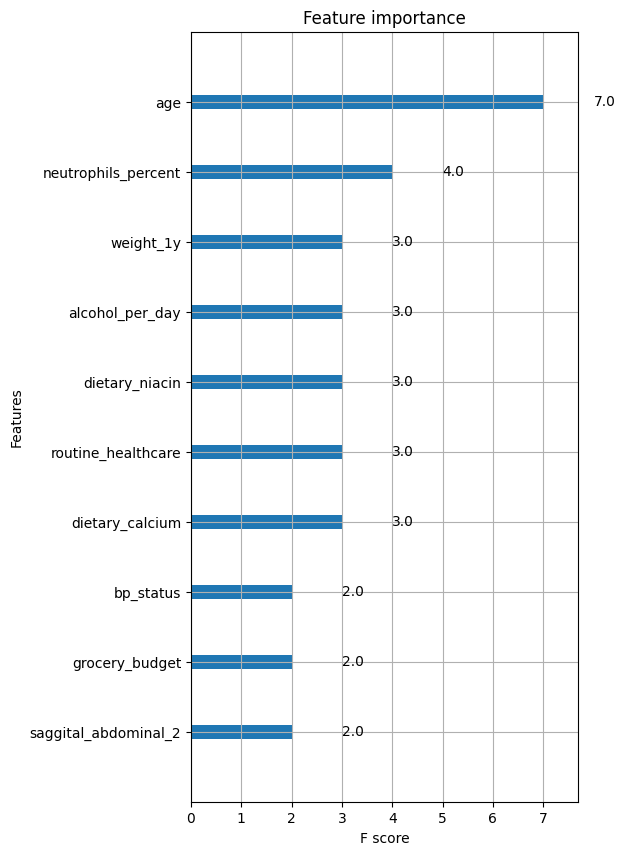

In [140]:
ax = plot_importance(xgc, max_num_features=10)
fig = ax.figure
fig.set_size_inches(5, 10)

In [ ]:
d = len(X_train)+len(X_test)
print(X.shape, len(X_train),len(y_train),"xtest",len(X_test),"ytest:",len(y_test),"sum:",d)

In [ ]:
print(X_train)
model  = Sequential()
model.add(Embedding(1000000,128,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.6))
model.add(LSTM(200, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(47,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [ ]:
batch_size = 128
checkPoint = ModelCheckpoint('model_checkpoint.h5',
                             monitor='loss',
                             verbose=1,
                             save_best_only=True, mode='min')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size = batch_size)

y_pred = model.predict(X_test)

In [ ]:
def transform_predict(message: list):
    return pad_sequences(tokenizer.texts_to_sequences(message), maxlen=28, dtype='int32', value=0) 
  
def predict(X):
    X = transform_predict(X)
    return model.predict(X)[0]

In [ ]:
def plot_learning_curve(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the learning curve
plot_learning_curve(history)

In [ ]:
model.save('model2')
